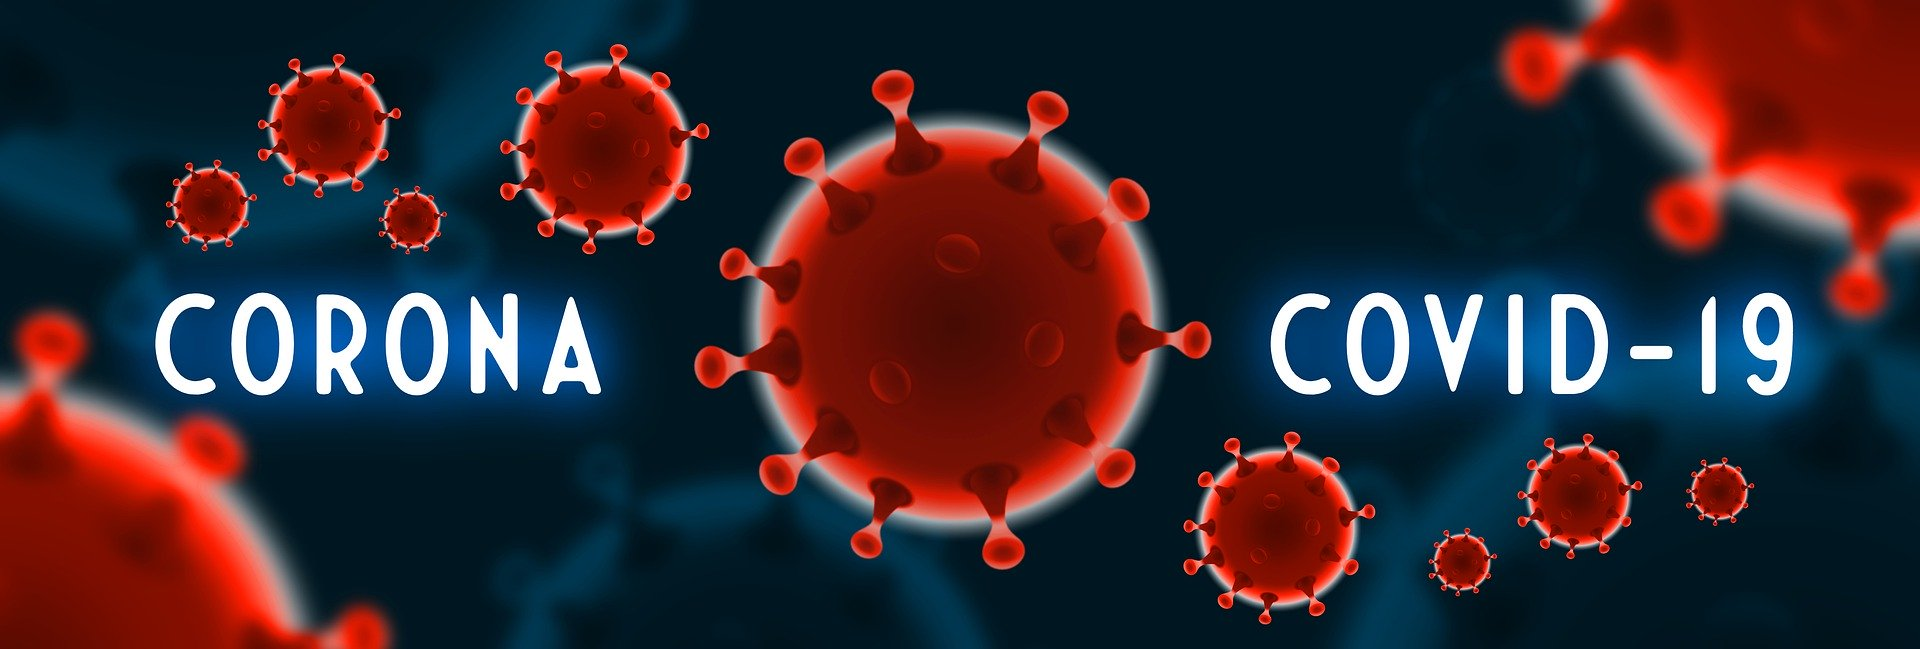

Note: Datasets are up to 04/26/22

# Covid Introduction

Add some text here about importance of this

We'll only look at the 50 states in the US and so we'll be ignoring other US owned territories such as Puerto Rico, Guam, Northern Mariana Islands, the U.S. Virgin Islands, and American Samoa.

## Data Collection/Curation

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, re, datetime

The John's Hopkins curated dataset can be found [here](https://github.com/CSSEGISandData/COVID-19). For our analysis, we'll be using the time series csv file for confirmed cases and deaths within the United States.

In [2]:
confirmed_US = pd.read_csv("datasets/time_series_covid19_confirmed_US.csv")
deaths_US = pd.read_csv("datasets/time_series_covid19_deaths_US.csv")
confirmed_US['Admin2'] = confirmed_US['Admin2'].astype(str)
deaths_US['Admin2'] = deaths_US['Admin2'].astype(str)


confirmed_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15752,15752,15771,15755,15757,15759,15762,15762,15762,15814
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,55547,55547,55579,55564,55571,55576,55591,55591,55591,55607
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5658,5658,5659,5658,5658,5659,5660,5660,5660,5661
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6428,6428,6428,6428,6428,6428,6430,6430,6430,6435
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,14959,14959,14963,14961,14963,14967,14967,14967,14967,14967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,9945,9945,9945,9975,9975,9975,9975,9975,9975,9975
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5624,5624,5624,5625,5625,5625,5625,5625,5625,5625
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2357,2357,2357,2357,2357,2357,2357,2357,2357,2357


Next we'll check for null values

In [133]:
deaths_US[deaths_US.isna().any(axis=1)]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
1269,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,...,16,16,16,16,16,16,16,16,16,17
1306,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,...,5,5,5,5,5,5,5,5,5,5
1338,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,...,177,177,177,177,177,177,177,177,177,177
1593,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,...,1290,1290,1290,1290,1290,1290,1290,1290,1290,1290
2956,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,...,247,247,247,247,247,247,247,247,247,247
2961,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,167,167,167,167,167,167,167,167,167,167
2980,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,81,81,81,81,81,81,81,81,81,81
2981,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,648,648,648,648,648,649,649,649,649,649
2984,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,106,106,106,106,106,106,106,106,106,106
2992,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,...,453,453,453,453,453,453,453,453,453,453


In [4]:
confirmed_US[confirmed_US.isna().any(axis=1)]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
1269,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,...,6865,6865,6865,6872,6882,6892,6894,6894,6894,6902
1306,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,...,327,327,327,327,327,327,327,327,327,327
1338,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,...,38290,38290,38290,38290,38294,38294,38294,38294,38294,38294
1593,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,...,112687,112687,112687,112687,112687,112687,112687,112687,112687,112687
2956,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,...,51544,51544,51544,51544,51544,51575,51575,51575,51575,51575
2961,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,20694,20694,20694,20694,20694,20699,20699,20699,20699,20699
2980,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,10053,10053,10053,10053,10053,10067,10067,10067,10067,10067
2981,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,63488,63488,63488,63488,63488,63559,63559,63559,63559,63559
2984,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,12731,12731,12731,12731,12731,12741,12741,12741,12741,12741
2992,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,...,73802,73802,73802,73802,73802,73906,73906,73906,73906,73906


Here we see that the NaN values are concerning the FIPS code. However, we would not need the FIPS code as we are not concerned about specific counties in our analysis. Therefore, we can safely ignore these NaN values.

*Talk about tidy data here...*

The dataset above has each date as an individual column thus making the table too "wide". This in turn makes it harder in analyzing the date (albeit it's easier to read). We'll convert the table from the current wide format to a long format by turning each date column into their own row through a process called melting. More information about melting can be found [here](https://dataindependent.com/pandas/pandas-melt-pd-melt/).

In [16]:
# finding index of first date
idx = next(x for x in confirmed_US.columns.values if (re.match('(\d{1,2})[/.-](\d{1,2})[/.-](\d{2})$', x)))
idx = np.where(confirmed_US.columns.values == idx)[0][0]

# melting our dataframe with our identifier variables being everything up to idx+3
confirmed_US = pd.melt(confirmed_US, id_vars=confirmed_US.columns[0:idx])
confirmed_US.rename(columns={"value": "Cases", "variable": "Date"}, inplace=True)
confirmed_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757145,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",4/25/22,9975
2757146,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",4/25/22,5625
2757147,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",4/25/22,0
2757148,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",4/25/22,2357


Here we see that our number of columns have been reduced from 822 to just 13! Although our number of rows did increase by the respective amount that the columns decreased, this is fine as we want each observation (dates in our case) to be in its own row.

In addition to melting our data, our next step would be to convert each of the dates inside our dataframe to [datetime](https://docs.python.org/3/library/datetime.html) objects. These are objects supplied by the datetime module that allows us to easily perform comparison operations and range queries on dates. To make things easier, pandas has a method called ```to_datetime()``` that allows us to streamline this process.

In [17]:
confirmed_US['Date'] = pd.to_datetime(confirmed_US['Date'], format="%m/%d/%y")
confirmed_US.head(1000)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",2020-01-22,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",2020-01-22,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",2020-01-22,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",2020-01-22,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,84020139,US,USA,840,20139.0,Osage,Kansas,US,38.652360,-95.727080,"Osage, Kansas, US",2020-01-22,0
996,84020141,US,USA,840,20141.0,Osborne,Kansas,US,39.350344,-98.767538,"Osborne, Kansas, US",2020-01-22,0
997,84020143,US,USA,840,20143.0,Ottawa,Kansas,US,39.132374,-97.650203,"Ottawa, Kansas, US",2020-01-22,0
998,84080020,US,USA,840,80020.0,Out of KS,Kansas,US,0.000000,0.000000,"Out of KS, Kansas, US",2020-01-22,0


We're not concerned about the cases from the county inside of each state but more about the total cases for the state itself. Here we'll aggregate the cases in each state by adding up all the county cases.

In [24]:
totalCases_US = confirmed_US.groupby(['Province_State', 'Date']).agg({'Cases': 'sum'})
totalCases_US.reset_index(inplace=True)  
totalCases_US[(totalCases_US['Province_State'] == "Maryland") & (totalCases_US['Cases'] > 0)].head(10)

,Province_State,Date,Cases
19844,Maryland,2020-03-06,3
19845,Maryland,2020-03-07,3
19846,Maryland,2020-03-08,5
19847,Maryland,2020-03-09,5
19848,Maryland,2020-03-10,8
19849,Maryland,2020-03-11,9
19850,Maryland,2020-03-12,12
19851,Maryland,2020-03-13,18
19852,Maryland,2020-03-14,27
19853,Maryland,2020-03-15,24


Now we have the total number of cases fo each state for each date. However, another metric we want is the number of daily cases each day which is defined by the total cases today minus the total cases yesterday. 

We'll manipulate our dataframe so that we have an additional column called ```daily_cases``` defined as above. We'll take advatange of pandas's ```diff()``` function which allows us to compute the difference of a column between consecutive rows in one line. One issue with directly doing this is that at positions where we transition from one state to the next, we can have large negative values because ```diff()``` is subtracting the most recent total cases for one state from the oldest total cases for a different state. To circumvent this, we'll filter and perform the ```diff()``` separetly for each state.

In [36]:
# getting a list of states in our dataset
states = np.unique(confirmed_US['Province_State'].values)
totalCases_US['daily_cases'] = np.NaN # instanstiating with default value of NaN

# iterating through each state
for s in states:
    filtered = totalCases_US.loc[totalCases_US['Province_State'] == s] # getting a separate  dataframe for each state
    totalCases_US.loc[totalCases_US['Province_State'] == s, 'daily_cases']= filtered['Cases'].diff() # adding daily_cases

totalCases_US[(totalCases_US['Province_State'] == "Maryland") & (totalCases_US['Cases'] > 0)].head(10)

,Province_State,Date,Cases,daily_cases
19844,Maryland,2020-03-06,3,3.0
19845,Maryland,2020-03-07,3,0.0
19846,Maryland,2020-03-08,5,2.0
19847,Maryland,2020-03-09,5,0.0
19848,Maryland,2020-03-10,8,3.0
19849,Maryland,2020-03-11,9,1.0
19850,Maryland,2020-03-12,12,3.0
19851,Maryland,2020-03-13,18,6.0
19852,Maryland,2020-03-14,27,9.0
19853,Maryland,2020-03-15,24,-3.0


Now we have modified the Johns Hopkins dataset to give us the culmulative and daily cases grouped by date and state. However, just by itself this modified Johns Hopkins dataset is not all that useful if we want to discover underlying trends and associations in COVID cases and debts. If all we had were the case/death counts we'll be limited in the scope of our findings. To amend this we'll import another dataset that contains demographic information about each US state from 2016 to 2020.

The following csv [dataset](https://corgis-edu.github.io/corgis/csv/state_demographics/) imported below summarizes information about each US state in 2016-2020 using information acquired from the [US Census Bureau](https://www.census.gov/quickfacts/fact/table/US/PST045221). This dataset does incorrectly name the 2020 population as the 2014 popuation. We compared the population in this column using the US Census website and it was indeed a misnaming. Therefore we will rename it to 2020 below. 

In [63]:
state_demographics = pd.read_csv("datasets/state_demographics.csv")
state_demographics.rename(columns={'Population.2014 Population':'Population.2020 Population'}, inplace=True)

state_demographics.head(10)

,State,Population.Population Percent Change,Population.2020 Population,Population.2010 Population,Age.Percent Under 5 Years,Age.Percent Under 18 Years,Age.Percent 65 and Older,Miscellaneous.Percent Female,Ethnicities.White Alone,Ethnicities.Black Alone,...,Employment.Nonemployer Establishments,Employment.Firms.Total,Employment.Firms.Men-Owned,Employment.Firms.Women-Owned,Employment.Firms.Minority-Owned,Employment.Firms.Nonminority-Owned,Employment.Firms.Veteran-Owned,Employment.Firms.Nonveteran-Owned,Population.Population per Square Mile,Miscellaneous.Land Area
0,Connecticut,-10.2,3605944,3574097,5.1,20.4,17.7,51.2,79.7,12.2,...,286874,326693,187845,106678,56113,259614,31056,281182,738.1,4842.36
1,Delaware,8.4,989948,897934,5.6,20.9,19.4,51.7,69.2,23.2,...,68623,73418,38328,23964,14440,54782,7206,60318,460.8,1948.54
2,District of Columbia,17.3,689545,601723,6.4,18.2,12.4,52.6,46.0,46.0,...,62583,63408,30237,27064,29983,29521,5070,54217,9856.5,61.05
3,Florida,14.2,21538187,18801310,5.3,19.7,20.9,51.1,77.3,16.9,...,2388050,2100187,1084885,807817,926112,1121749,185756,1846686,350.6,53624.76
4,Georgia,9.6,10711908,9687653,6.2,23.6,14.3,51.4,60.2,32.6,...,955621,929864,480578,376506,371588,538893,96787,800585,168.4,57513.49
5,Hawaii,4.1,1455271,1360301,6.0,21.2,19.0,50.0,25.5,2.2,...,112589,118454,60409,44453,74208,38510,11148,101334,211.8,6422.63
6,Alabama,2.6,5024279,4779736,6.0,22.2,17.3,51.7,69.1,26.8,...,336445,374153,203604,137630,92219,272651,41943,316984,94.4,50645.33
7,Alaska,3.0,733391,710231,7.0,24.6,12.5,47.9,65.3,3.7,...,57391,68032,35402,22141,13688,51147,7953,56091,1.2,570640.95
8,Arizona,13.9,7151502,6392017,5.9,22.5,18.0,50.3,82.6,5.2,...,502593,499926,245243,182425,135313,344981,46780,427582,56.3,113594.08
9,Arkansas,3.5,3011524,2915918,6.2,23.2,17.4,50.9,79.0,15.7,...,209179,231959,123158,75962,35982,189029,25915,192988,56.0,52035.48


In [10]:
state_demographics.columns

Index(['State', 'Population.Population Percent Change',
       'Population.2014 Population', 'Population.2010 Population',
       'Age.Percent Under 5 Years', 'Age.Percent Under 18 Years',
       'Age.Percent 65 and Older', 'Miscellaneous.Percent Female',
       'Ethnicities.White Alone', 'Ethnicities.Black Alone',
       'Ethnicities.American Indian and Alaska Native Alone',
       'Ethnicities.Asian Alone',
       'Ethnicities.Native Hawaiian and Other Pacific Islander Alone',
       'Ethnicities.Two or More Races', 'Ethnicities.Hispanic or Latino',
       'Ethnicities.White Alone, not Hispanic or Latino',
       'Miscellaneous.Veterans', 'Miscellaneous.Foreign Born',
       'Housing.Housing Units', 'Housing.Homeownership Rate',
       'Housing.Median Value of Owner-Occupied Units', 'Housing.Households',
       'Housing.Persons per Household',
       'Miscellaneous.Living in Same House +1 Years',
       'Miscellaneous.Language Other than English at Home',
       'Housing.Households w

Above we can see that the 2019 states dataset provides us with around 40-ish columns of demographic information. We'll later join both our counties dataframe and cases/deaths dataframe using County name and/or FIPS # to visualize the association of COVID with some of these demographic information.

One more thing to note is that the Populaiion per Square Mile column contains the population density measured in 2010, which is a decade before the year that we want. Therefore, we'll import another [dataset](https://www.census.gov/data/tables/time-series/dec/density-data-text.html) from the US census that contains the population density of each state from 1910-2020 

In [77]:
popden_data = pd.read_csv("datasets/populationdensity.csv")
popden_data[popden_data['Year'] == 2020].head(10)


,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
627,Alabama,State,2020,"5,024,279",5.1,99.2,29.0,7.0,0.0,"718,579"
628,Alaska,State,2020,"733,391",3.3,1.3,52.0,1.0,0.0,"736,081"
629,Arizona,State,2020,"7,151,502",11.9,62.9,35.0,9.0,0.0,"795,436"
630,Arkansas,State,2020,"3,011,524",3.3,57.9,36.0,4.0,0.0,"753,439"
631,California,State,2020,"39,538,223",6.1,253.7,13.0,52.0,-1.0,"761,091"
632,Colorado,State,2020,"5,773,714",14.8,55.7,39.0,8.0,1.0,"722,771"
633,Connecticut,State,2020,"3,605,944",0.9,744.7,6.0,5.0,0.0,"721,660"
634,Delaware,State,2020,"989,948",10.2,508,8.0,1.0,0.0,"990,837"
635,District of Columbia,State,2020,"689,545",14.6,"11,280.00",1.0,NaN,NaN,NaN
636,Florida,State,2020,"21,538,187",14.6,401.4,10.0,28.0,1.0,"770,376"


Here we'll update our previous demographics dataset with this data.

In [78]:
# some of the numbers have commas i.e (1,305.3) which can't be parsed to a float, therefore we'll remove the commas
popden_data['Resident Population Density'] = popden_data['Resident Population Density'].str.replace(",","").astype(float)

# iterating through the rows and updating to 2020 population density
for i, row in state_demographics.iterrows():
    state = row['State']
    population_density = popden_data[(popden_data['Name'] == state) & (popden_data['Year'] == 2020)]['Resident Population Density']
    state_demographics.at[i,'Population.Population per Square Mile'] = population_density

In [28]:
len(np.unique(state_demographics['State']))

51

In [31]:
np.unique(totalCases_US['Province_State'])

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

*TODO: Drop the columns that aren't in the 50 states + district of colum*

## Exploratory data analysis

In this next step, we want to get a feel for the data through visualizing and computing summary statistics for our dataset. Through the plots and statisitcs, we'll be able to notice trends in the data as well as the distribution. These key insights will give us an idea of what approaches we should take for our machine learning algorithms.

To a general idea of trend, we'll first plot a graphic of the number of daily cases for the entire US.

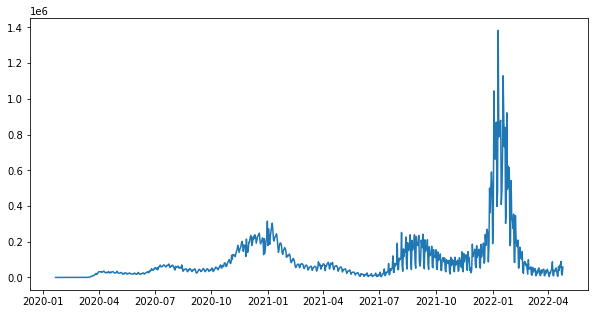

In [43]:
# Adding up all the daily cases from all states per date
totalDailyCasesUS = totalCases_US.groupby(['Date']).agg({'daily_cases': 'sum'})
totalDailyCasesUS.reset_index(inplace=True) # reseting index so that date isn't the index

fig, ax = plt.subplots(figsize=(10,5)) 
ax.plot(totalDailyCasesUS['Date'], totalDailyCasesUS['daily_cases']) #line plot 
#TODO: ADD TITLES

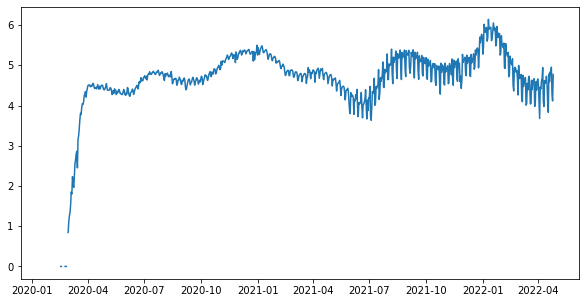

In [80]:
fig, ax = plt.subplots(figsize=(10,5)) 
totalDailyCasesUS['log'] = np.log10(totalDailyCasesUS['daily_cases'].replace(0, np.NaN))
np.log10(totalDailyCasesUS['daily_cases'].replace(0, np.nan))
ax.plot(totalDailyCasesUS['Date'], totalDailyCasesUS['log'])


#TODO: ADD TITLES

Since one of our main questions is to determine whether states have different average rates of infections, the most obvious thing to do here is to plot the daily infections for each state over the length of COVID. 

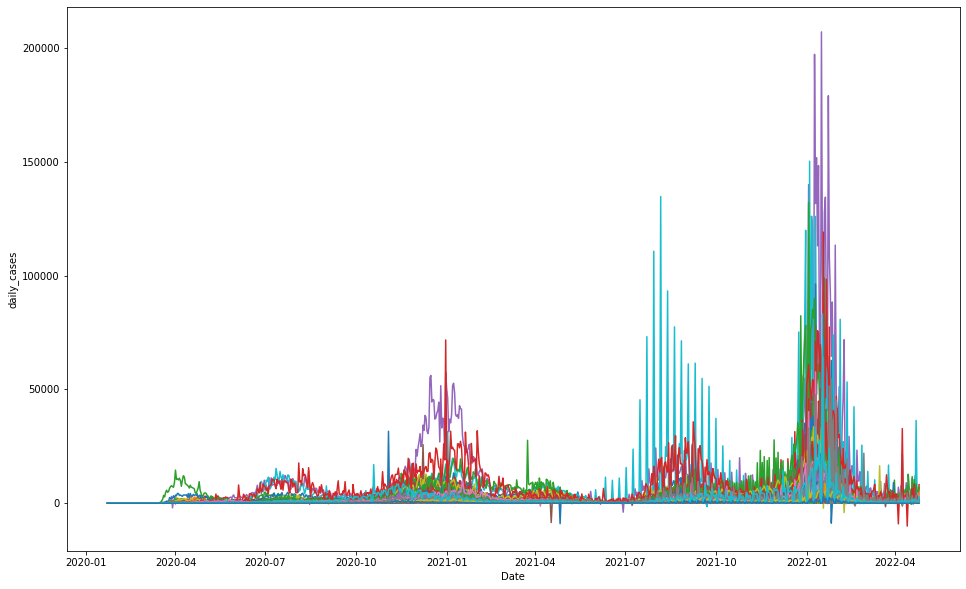

In [48]:
import seaborn as sns

states = np.unique(state_demographics['State'])
fig, ax = plt.subplots(figsize=(16,10))

for s in states:
    state_filter = totalCases_US.loc[totalCases_US['Province_State'] == s]
    sns.lineplot(x="Date", y="daily_cases", data=state_filter)

An important thing here to note are the spikes in cases. These spikes typically are attributed to new COVID-19 variants popping up which have increased transmittivity...

One thing we would like to examine is whether the demographics of a county has an association with COVID cases. 

Since there's numerous demographic columns in our states_demographic dataframe, we'll define a function that plots the variables that we want to show a relationship between. 

In [147]:
def plot_by(demographic):
    states = np.unique(state_demographics['State'])
    
    end_date = datetime.datetime.strptime("2022-04-25", '%Y-%m-%d')
    datefilter = totalCases_US[totalCases_US['Date'] == end_date]

    bivariate_data = dict()
    
    for s in states:
        population = state_demographics[state_demographics['State'] == s]['Population.2020 Population'].values[0]
        cases = datefilter[datefilter['Province_State'] == s]['Cases'].values[0]
        demo = state_demographics[state_demographics['State'] == s][demographic].values[0]
        bivariate_data[demo] = (cases/population)
        #bivariate_data[demo] = cases
        
    x = list(bivariate_data.keys())
    y = list(bivariate_data.values())
    
    fig, ax = plt.subplots(figsize=(12,6))
    sns.scatterplot(x=x,y=y)
    
    #TODO: Add axes titles
    
    return x,y

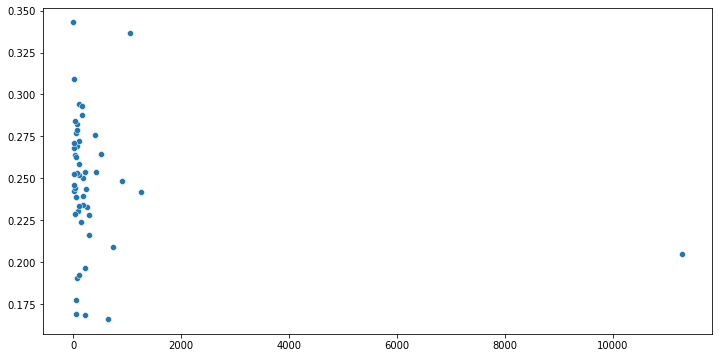

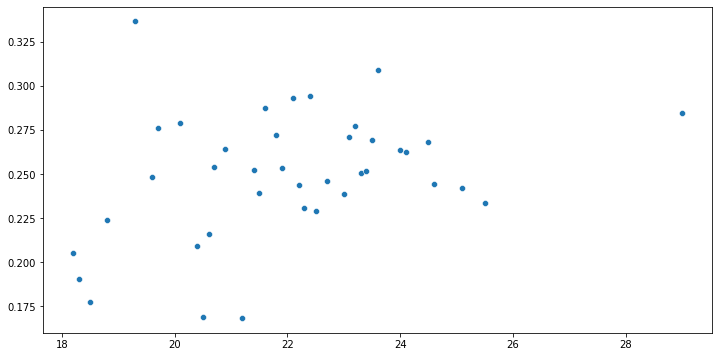

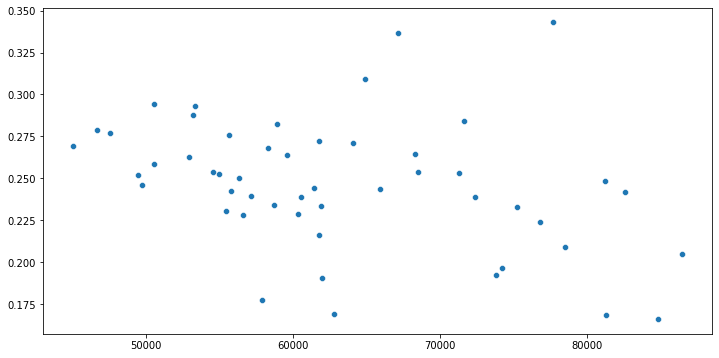

In [146]:
x,y = plot_by("Population.Population per Square Mile")
x,y = plot_by("Age.Percent Under 18 Years")
x,y = plot_by("Income.Median Houseold Income")


In [50]:
state_demographics.columns

Index(['State', 'Population.Population Percent Change',
       'Population.2014 Population', 'Population.2010 Population',
       'Age.Percent Under 5 Years', 'Age.Percent Under 18 Years',
       'Age.Percent 65 and Older', 'Miscellaneous.Percent Female',
       'Ethnicities.White Alone', 'Ethnicities.Black Alone',
       'Ethnicities.American Indian and Alaska Native Alone',
       'Ethnicities.Asian Alone',
       'Ethnicities.Native Hawaiian and Other Pacific Islander Alone',
       'Ethnicities.Two or More Races', 'Ethnicities.Hispanic or Latino',
       'Ethnicities.White Alone, not Hispanic or Latino',
       'Miscellaneous.Veterans', 'Miscellaneous.Foreign Born',
       'Housing.Housing Units', 'Housing.Homeownership Rate',
       'Housing.Median Value of Owner-Occupied Units', 'Housing.Households',
       'Housing.Persons per Household',
       'Miscellaneous.Living in Same House +1 Years',
       'Miscellaneous.Language Other than English at Home',
       'Housing.Households w

## Hypothesis Testing and Regression

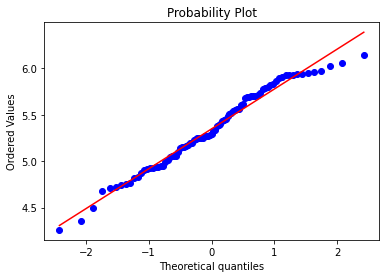

In [76]:
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import pylab as py

df = totalDailyCasesUS.query('20211201 < Date < 20220301')
# sm.qqplot(np.array[1,4,5,5,3,2,1,4], line ='45')
stats.probplot(df['log'], dist="norm", plot=py)
py.show()

## Communication of Insights

# Dead Code Zone

In [3]:
# confirmed_US.dropna(axis=0, inplace=True)
# deaths_US.dropna(axis=0, inplace=True)
# confirmed_US

In [5]:
# # https://www.openintro.org/data/?data=county_complete
# # https://www.openintro.org/data/index.php?data=county_2019
# counties = pd.read_csv("datasets/county_2019.csv") 
# counties

In [ ]:
# # Getting page contents and using bs4 to parse the data as HTML
# import requests
# r = requests.get('https://gisgeography.com/' +"fdsaf" +'-county-map/')
# root = BeautifulSoup(r.content, 'lxml')
    
# # Finding the table
# tb = root.findAll("table")
# len(tb)
# # tb[1]

# # county = pd.read_html(tb[1].prettify())[0]
# # county

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# # getting all state names
# state_50 = np.unique(counties['state'])
# state_50.remove("District of Columbia")

# first = True

# county_area = None

# for state in state_50:
#     # Getting page contents and using bs4 to parse the data as HTML
#     param = "-".join(state.split(" "))
#     r = requests.get('https://gisgeography.com/' + param + '-county-map/')
#     root = BeautifulSoup(r.content, 'lxml')
    
#     # Finding the table
#     tb = root.findAll("table")
    
#     if (len(tb) > 0):
#         county = pd.read_html(tb[1].prettify())[0]
#         county['state'] = state
#         print(state)

#         # first iteration when county_area dataframe is empty
#         if (first):
#             county_area = county
#             first = False

#         # combining our aggregated counties dataframe with the current iteration
#         else:
#             county_area = pd.concat([county_area, county])

In [15]:
# print(len(np.unique(county_area['FIPS Code'])))

# state_50 = state_50[state_50 != "District of Columbia"]
# temp = counties[counties.state.isin(state_50)]
# #print(np.unique(counties['state']))
# #counties[counties["fips"] == 2105]

In [139]:
# # just debugging some missing values stuff ehre

# len(np.unique(confirmed_US["FIPS"]))
# county_area
# counties[counties["name"] == "Autauga County"]['pop']
# counties[counties["fips"] == 2195]
# county_area[county_area['FIPS Code'] == 2195]

# county_area[county_area['FIPS Code'] == 46102];
# county_area[county_area['state'] == "Alaska"];

In [140]:
# counties['Pop_Density'] = np.NaN
# for i, row in counties.iterrows():
#     fips = row['fips']
#     area = county_area[county_area['FIPS Code'] == fips]
#     if (len(area) > 0):
#         population = row['pop']
#         counties.at[i,'Pop_Density'] = population/area['Area (sq mi)']

# # counties with no fips code matches
# counties[counties['Pop_Density'].isna()]

# # how to handle? replace with mean or median?

In [14]:
# confirmed_US['area'] = np.NaN
# confirmed_US['pop'] = np.NaN
# confirmed_US['pop_density'] = np.NaN

# for i, row in confirmed_US.iterrows():
#     fips = row['FIPS']
#     area = county_area[county_area['FIPS Code'] == fips]["Area (sq mi)"]
#     pop = counties[counties['fips'] == fips]["pop"]
#     if (len(area) > 0):
#         confirmed_US.at[i,'area'] = area
#         confirmed_US.at[i,'pop'] = pop

In [13]:
# filtered = confirmed_US[confirmed_US['Province_State'].isin(state_50)]
# filtered[filtered['pop'].isnull()]

# # again what to do with missing value?

In [12]:
# confirmed_US['pop_density'] = confirmed_US['pop']/confirmed_US['area']
# confirmed_US

In [11]:
# cols = confirmed_US.columns.tolist()
# cols.insert(8, cols.pop())
# cols.insert(8, cols.pop())
# cols.insert(8, cols.pop())
# confirmed_US = confirmed_US[cols]